In [1]:
import datashader as ds
import datashader.transfer_functions as tf
import dask.dataframe as dd
import numpy as np
import pandas as pd

In [2]:
df = dd.io.read_csv('supp_dots_2.csv', names=['easting', 'northing', 'race'])

In [27]:
dfh = dd.read_hdf('out_2.h5', 'dots', start=0)

In [28]:
dfh.columns = ['easting', 'northing', 'race']

In [29]:
df = dfh.persist()

In [30]:
df = df.categorize(columns=['race'])

In [31]:
df

Dask DataFrame Structure:
               easting northing             race
npartitions=5                                   
               float64  float64  category[known]
                   ...      ...              ...
...                ...      ...              ...
                   ...      ...              ...
                   ...      ...              ...
Dask Name: _categorize_block, 10 tasks

In [32]:
df.head()

easting       northing       race
0  859243.264451 -513781.299842  no_hsp_wh
1  858471.629953 -513572.543671  no_hsp_wh
2  857958.660752 -515318.758292  no_hsp_wh
3  858932.110127 -513618.521741  no_hsp_wh
4  858569.189731 -515315.126396  no_hsp_wh

In [33]:
print(df.easting.min().compute())
print(df.easting.max().compute())

print(df.northing.min().compute())
print(df.northing.max().compute())

708163.6799882465
1043517.976409178
-782071.314400924
-230475.42243086614


In [34]:
USA           = ((-124.72,  -66.95), (23.55, 50.06))
LakeMichigan  = (( -91.68,  -83.97), (40.75, 44.08))
Chicago       = (( -88.29,  -87.30), (41.57, 42.00))
Chinatown     = (( -87.67,  -87.63), (41.84, 41.86))
NewYorkCity   = (( -74.39,  -73.44), (40.51, 40.91))
LosAngeles    = ((-118.53, -117.81), (33.63, 33.96))
Houston       = (( -96.05,  -94.68), (29.45, 30.11))
Austin        = (( -97.91,  -97.52), (30.17, 30.37))
NewOrleans    = (( -90.37,  -89.89), (29.82, 30.05))
Atlanta       = (( -84.88,  -84.04), (33.45, 33.84))

from datashader.utils import lnglat_to_meters as webm
x_range,y_range = [list(r) for r in webm(*USA)]

plot_width  = int(600)
plot_ratio = ((df.northing.max() - df.northing.min()) / (df.easting.max() - df.easting.min())).compute()
plot_height = int(plot_width*plot_ratio)

In [35]:
background = "black"

In [36]:
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9
from colorcet import fire
from IPython.core.display import HTML, display

export = partial(export_image, background=background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))

In [37]:
MINE = (
    (df.easting.min().compute(), df.easting.max().compute()),
    (df.northing.min().compute(), df.northing.max().compute()),
)

In [38]:
# cvs = ds.Canvas(plot_width, plot_height, *webm(*USA))
cvs = ds.Canvas(plot_width, plot_height, *MINE)
agg = cvs.points(df, 'easting', 'northing')

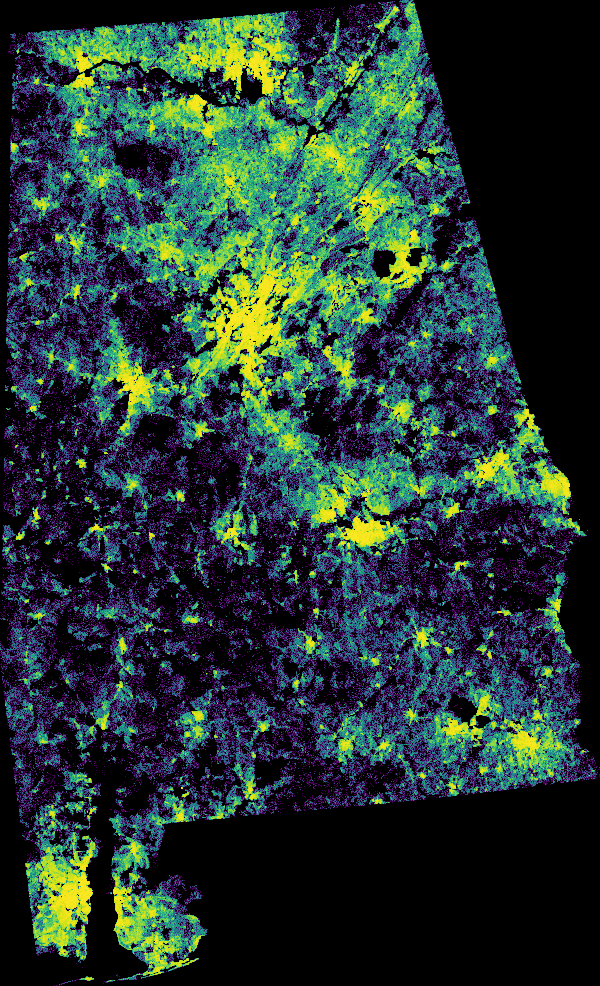

In [39]:
from datashader.colors import viridis, inferno
export(tf.shade(agg, cmap=cm(viridis), how='eq_hist'), "census_viridis_eq_hist")

In [16]:
color_key = {
    'no_hsp_wh': 'red',
    'no_hsp_bl': 'aqua',
    'no_hsp_nat': 'blue',
    'no_hsp_as': 'brown',
    'no_hsp_pac': 'blue',
    'no_hsp_oth': 'blue',
    'no_hsp_mlt': 'blue',
    'hsp_wh': 'lime',
    'hsp_bl': 'blue',
    'hsp_nat': 'blue',
    'hsp_as': 'blue',
    'hsp_pac': 'blue',
    'hsp_oth': 'blue',
    'hsp_mlt': 'blue',
}

In [17]:
def create_image(x_range, y_range, w=plot_width, h=plot_height):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(df, 'easting', 'northing', ds.count_cat('race'))
    img = tf.shade(agg, color_key=color_key, how='eq_hist')    
    return img

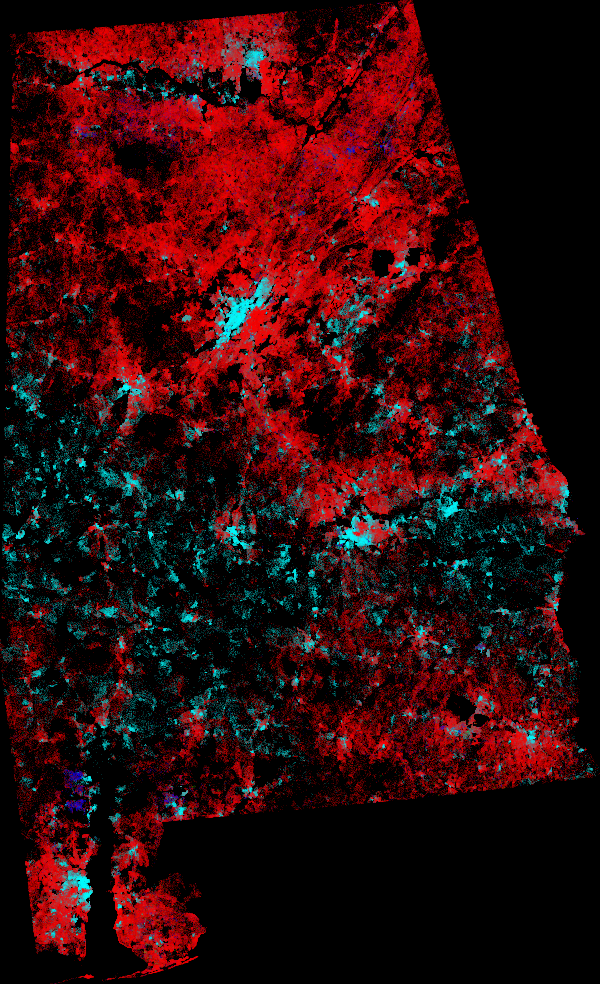

In [18]:
export(create_image(*MINE), "Zoom 0 - USA")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
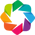

In [19]:
import holoviews as hv
import geoviews as gv
import dask.dataframe as dd

from bokeh.models import WMTSTileSource
from holoviews.operation.datashader import datashade, dynspread
hv.extension('bokeh')

%opts Overlay [width=900 height=525 xaxis=None yaxis=None]

In [21]:
df = df.rename(columns={'easting': 'Longitude', 'northing': 'Latitude'})

In [26]:
url = "http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.png"
geomap = gv.WMTS(WMTSTileSource(url=url))
points = hv.Points(gv.Dataset(df, kdims=['Longitude', 'Latitude'], vdims=['race']))
race = dynspread(datashade(points, cmap=color_key, element_type=gv.Image, aggregator=ds.count_cat('race')))
geomap * race

:DynamicMap   []